In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('movie_metadata.csv')

In [ ]:
print(data.shape)


(5043, 28)


In [6]:
# lets check the column wise info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
data = data.drop(['color',
                      'director_facebook_likes',
                      'actor_3_facebook_likes',
                      'actor_1_facebook_likes',
                      'cast_total_facebook_likes',
                      'actor_2_facebook_likes',
                      'facenumber_in_poster',
                      'content_rating',
                      'country',
                      'movie_imdb_link',
                      'aspect_ratio',
                      'plot_keywords',
                      ],
                       axis = 1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
round(100*(data.isnull().sum()/len(data.index)), 2)


director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.28
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [7]:
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]
data.isnull().sum()


color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [8]:
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        4
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  4
facenumber_in_poster          6
plot_keywords                24
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               41
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 67
movie_facebook_likes          0
dtype: int64

In [13]:
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the
# actor names with "Unknown Actor"

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# as we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()

144

In [14]:
# Lets convert the gross and budget from $ to Million $ to make our analysis easier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [15]:
# lets create a Profit column using the Budget and Gross

data['Profit'] = data['gross'] - data['budget']

# lets also check the name of Top 10 Profitable Movies
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [16]:
# By looking at the above result we can easily analyze that there are some duplicate

# lets print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

# so lets remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

# lets print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3879
No. of Rows After Removing Duplicates:  3845


In [17]:
data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [18]:
# lets check the values in the language column
data['language'].value_counts()

English       3667
French          37
Spanish         25
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Hebrew           2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [19]:
# so it is better to keep only two languages that is English and Foreign
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

# lets apply the function on the language column
data['language'] = data['language'].apply(language)

# lets check the values again
data['language'].value_counts()

English    3667
Foreign     178
Name: language, dtype: int64

In [20]:
# lets define a function for categorizing Duration of Movies
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'

# lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()

Short    2928
Long      917
Name: duration, dtype: int64

In [21]:
data['genres'].value_counts()

Drama                                      153
Comedy|Drama|Romance                       151
Comedy|Drama                               146
Comedy                                     145
Comedy|Romance                             136
                                          ... 
Adventure|Comedy|Sci-Fi|Western              1
Action|Biography|Drama|Thriller|War          1
Action|Fantasy|Western                       1
Action|Adventure|Family|Fantasy|Romance      1
Comedy|Crime|Horror                          1
Name: genres, Length: 760, dtype: int64

In [22]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [23]:
# we can see from the above output that most of the movies are having a lot of genres
# also, a movie can have so many genres so lets keep four genres

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


In [24]:
# lets also calculate the Social Media Popularity of a Movie

# to calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)




   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


<Axes: xlabel='movie_title', ylabel='Social_Media_Popularity'>

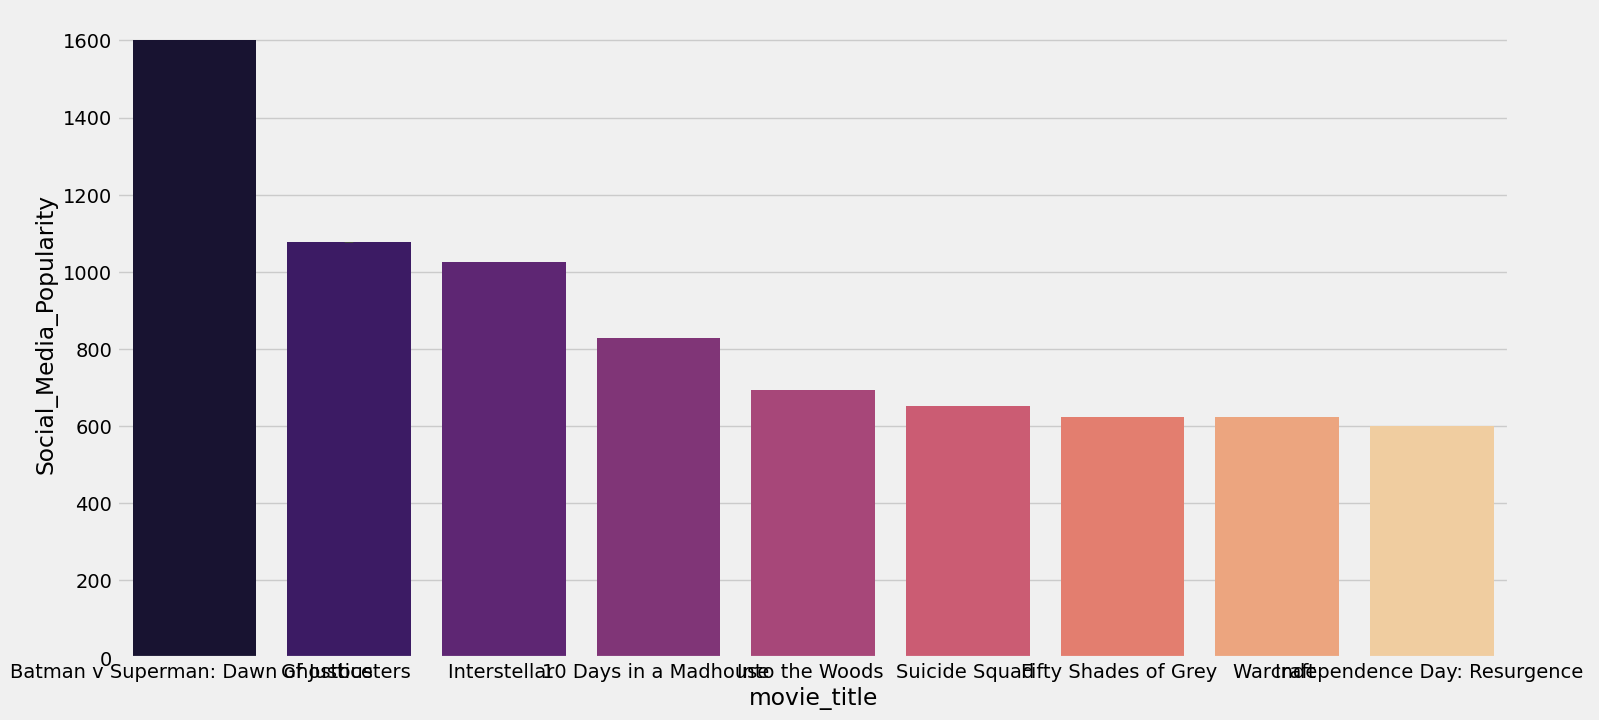

In [26]:
# Option 1: Remove one of the positional arguments
sns.barplot(x='movie_title', y='Social_Media_Popularity', data=x, palette='magma')

# Option 2: Use the 'data=' keyword argument
sns.barplot(data=x, x='movie_title', y='Social_Media_Popularity', palette='magma')

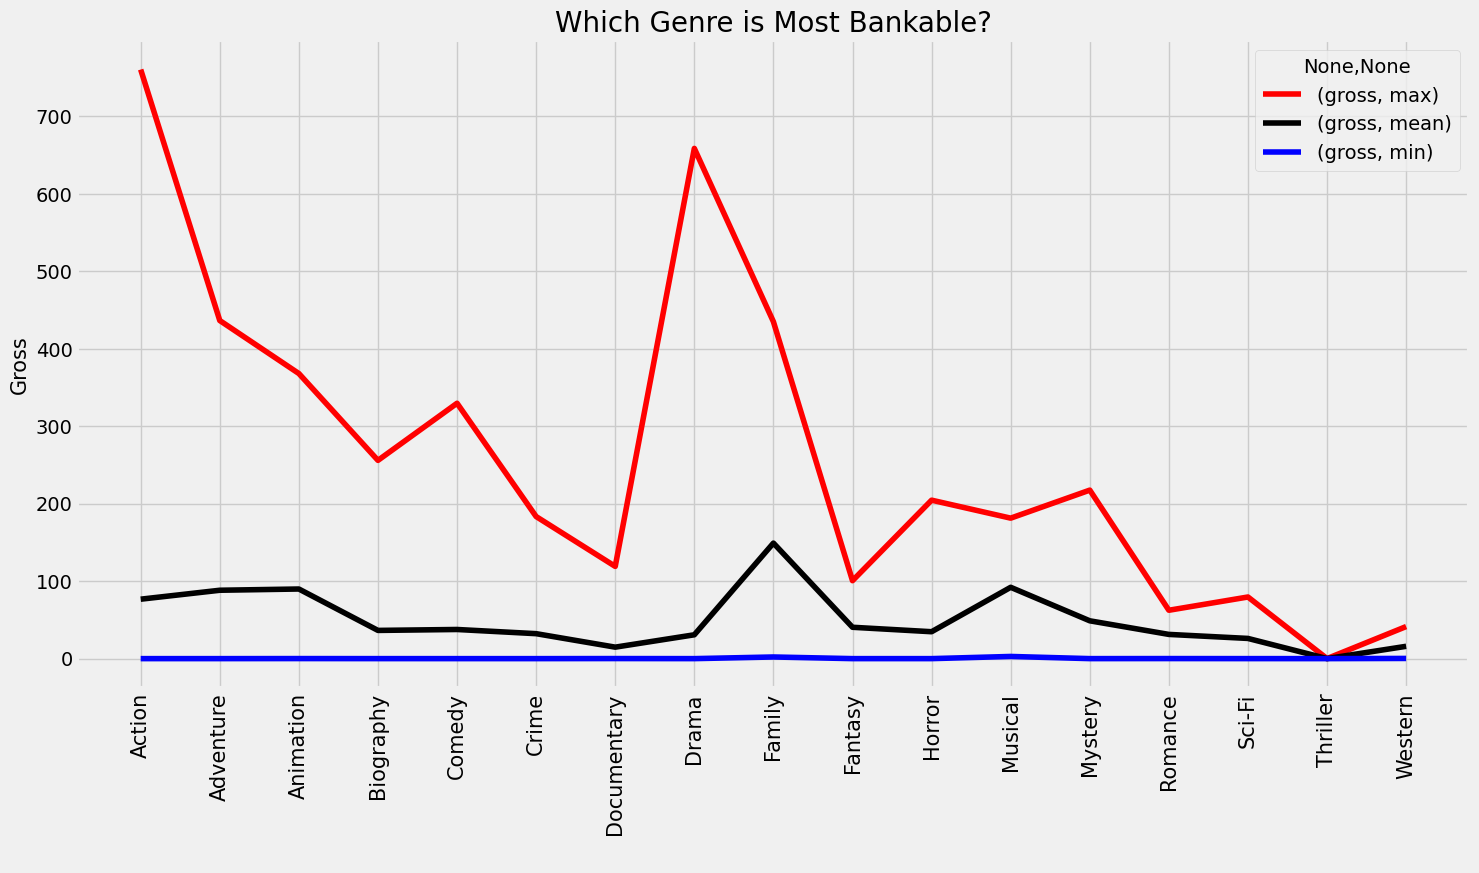

,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


The Most Profitable Movie from each Genre


In [27]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color=['red','black','blue'])

plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

Most Profitable Years in Box Office


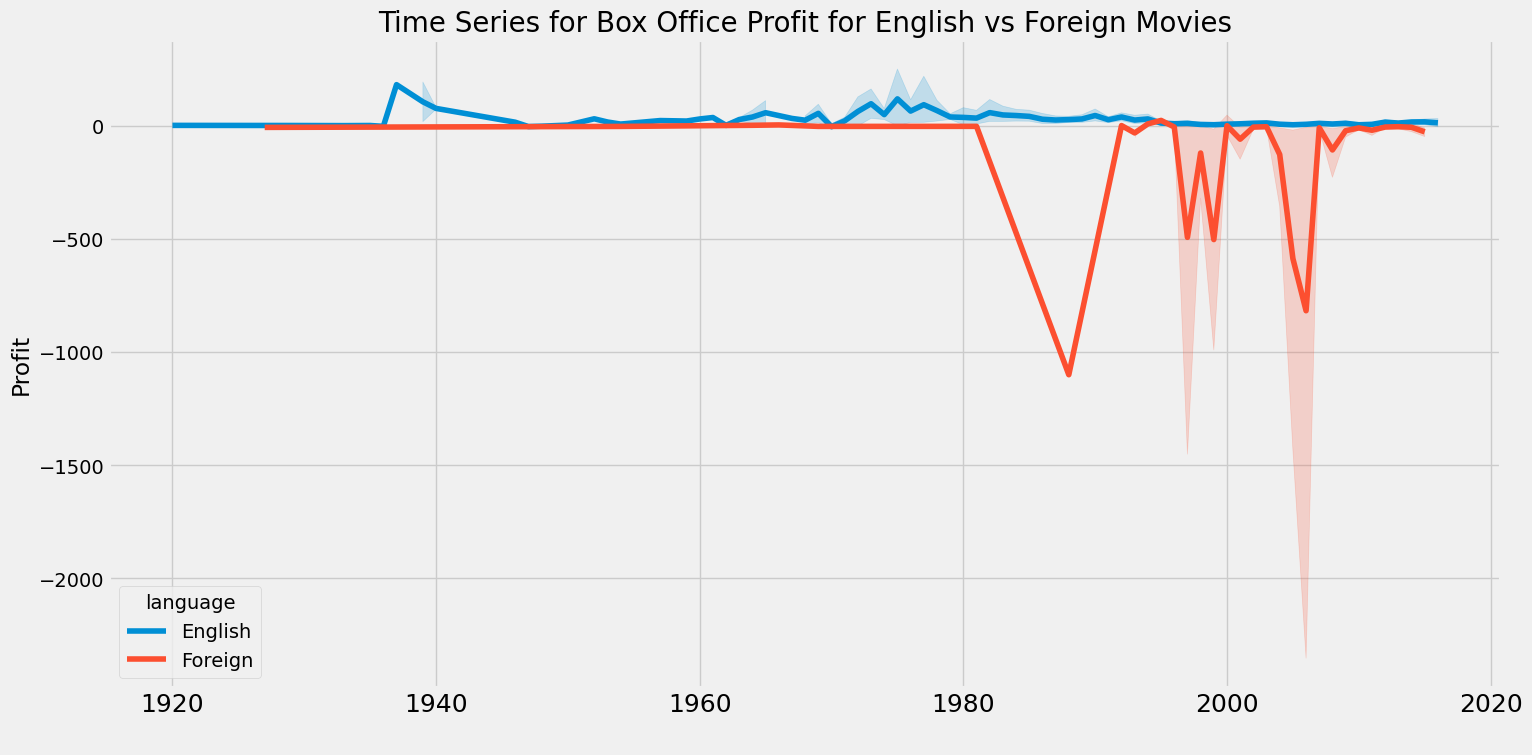

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [28]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

# lets plot them
sns.lineplot(data=data, x='title_year', y='Profit', hue='language')
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'Reds'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


Text(0.5, 1.0, 'Gross Comparison')

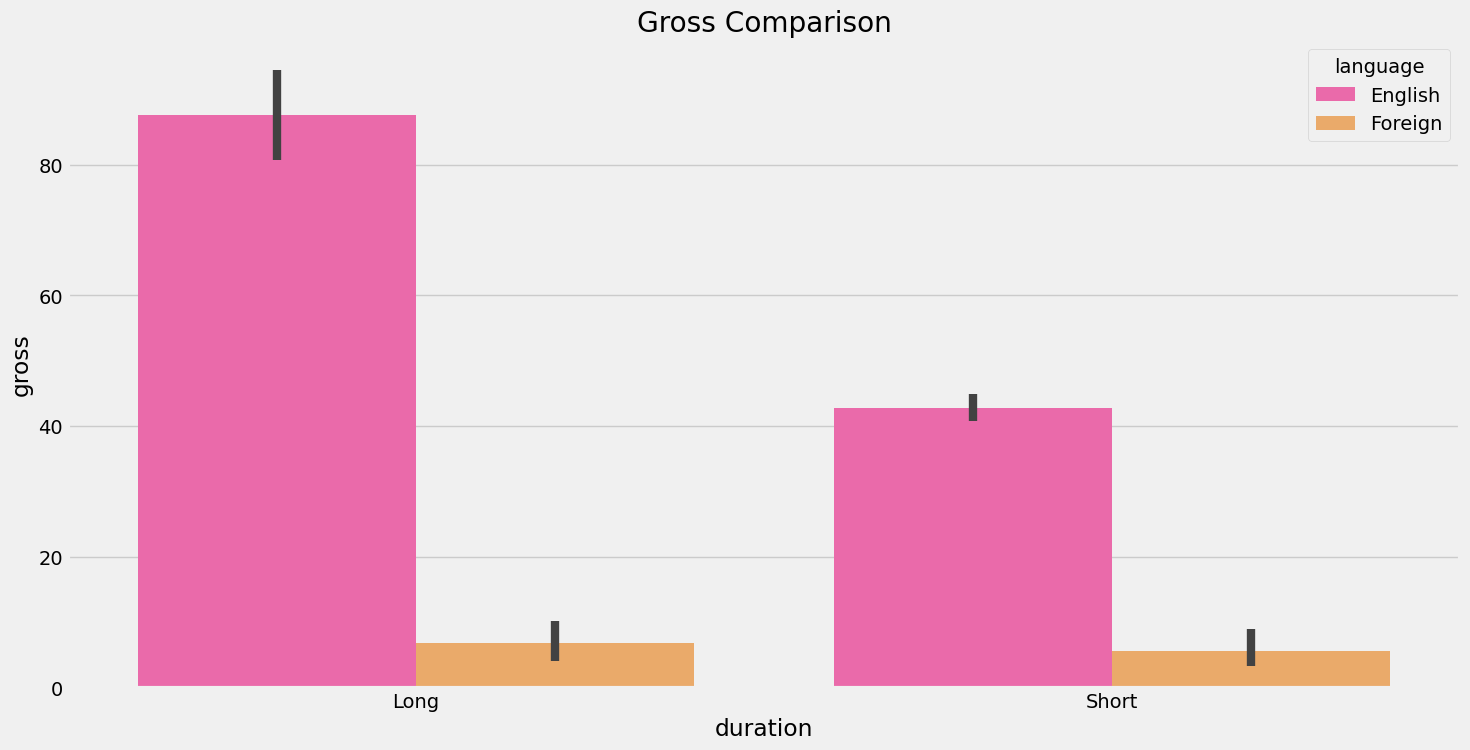

In [29]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

sns.barplot(x='duration', y='gross', hue='language', data=data, palette='spring')

plt.title('Gross Comparison')

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
         movie_title  imdb_score
4427  Modern Times          8.6


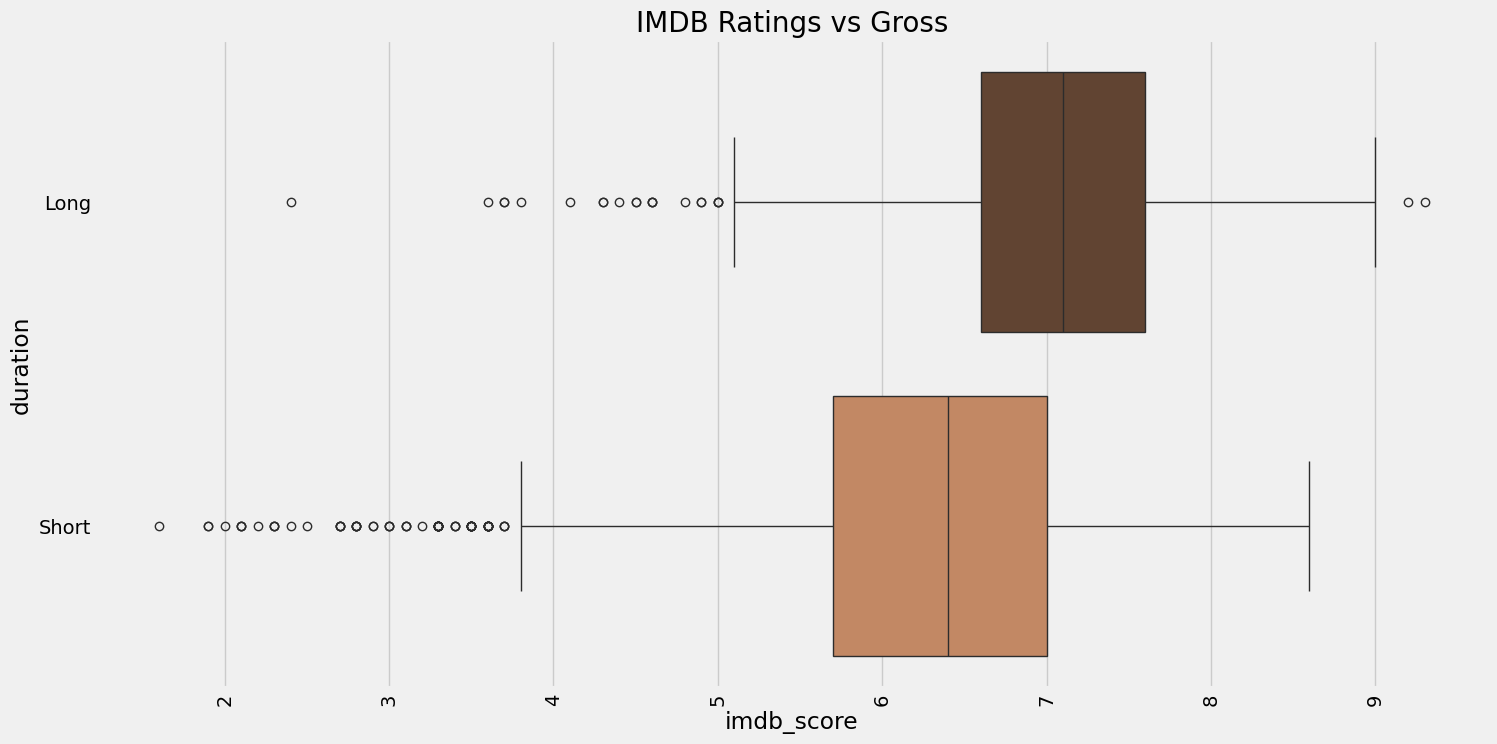

In [30]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n",
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n",
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

sns.boxplot(x='imdb_score', y='duration', palette = 'copper', data=data)
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [31]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)

    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [10]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85000000.0,112703470.0,2009.0,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45000000.0,46815748.0,1994.0,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40000000.0,94125426.0,2009.0,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35000000.0,124732962.0,2006.0,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35000000.0,14998070.0,2007.0,Drama|Thriller|War,English,6.2
1575,Out of Africa,31000000.0,87100000.0,1985.0,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30000000.0,63536011.0,2012.0,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30000000.0,23209440.0,1998.0,Drama,English,7.0
1925,The Hours,25000000.0,41597830.0,2002.0,Drama|Romance,English,7.6
2781,The Iron Lady,13000000.0,29959436.0,2011.0,Biography|Drama|History,English,6.4


In [32]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())

actors_report('Meryl Streep')

Time: 1985 2014
Max Gross : 143.70 Millions
Avg Gross : 55.23 Millions
Min Gross : 9.66 Millions
Number of 100 Million Movies : 4
Avg IMDB Score : 6.81
Most Common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [33]:
def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

In [40]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)

In [41]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4747,Foreign,Seven Samurai,8.7
4029,Foreign,City of God,8.7
2373,Foreign,Spirited Away,8.6
4259,Foreign,The Lives of Others,8.5
4921,Foreign,Children of Heaven,8.5
3931,Foreign,Samsara,8.5
1298,Foreign,Amélie,8.4
2323,Foreign,Princess Mononoke,8.4
1329,Foreign,Baahubali: The Beginning,8.4


In [42]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [43]:
recommend_movies_on_actors('Tom Cruise')


,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


In [44]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [45]:
genres = x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [49]:
recommendation_genres('Action')

Adventure    0.321034
Thriller     0.304155
Sci-Fi       0.295371
dtype: float64

In [50]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,NaN,NaN,The Names of Love,NaN,Savage Grace,NaN,Police Academy,NaN,Four Weddings and a Funeral,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [52]:
def recommendation_movie(movie):
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [53]:
# lets test on some results
recommendation_movie('The Expendables')

movie_title
Ponyo                                                                                   1.0
Amen.                                                                                   1.0
Murder by Numbers                                                                       1.0
Assassins                                                                               1.0
Aloft                                                                                   1.0
NaN                                                                                     1.0
The Messenger: The Story of Joan of Arc                                                 1.0
Flipped                                                                                 1.0
The Astronaut's Wife                                                                    1.0
The Master of Disguise                                                                  1.0
Drowning Mona                                                       